In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
diabetes_df = pd.read_csv("./dataset_diabetes/diabetic_data.csv")

In [3]:
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
result = (diabetes_df
            .groupby(['race', 'gender'], as_index = False)['num_medications']
            .mean()
            .sort_values(by = ['num_medications'], ascending = False))

In [5]:
result.head()

,race,gender,num_medications
13,Other,Unknown/Invalid,22.000000
7,Caucasian,Female,16.464335
8,Caucasian,Male,16.091046
1,?,Male,15.885764
0,?,Female,15.744925


In [13]:
plot_subset = diabetes_df[['race', 'gender', 'num_medications']]
print(plot_subset.columns)
print(plot_subset.shape[0] == diabetes_df.shape[0])
plot_subset.head()

Index(['race', 'gender', 'num_medications'], dtype='object')
True


,race,gender,num_medications
0,Caucasian,Female,1
1,Caucasian,Female,18
2,AfricanAmerican,Female,13
3,Caucasian,Male,16
4,Caucasian,Male,8


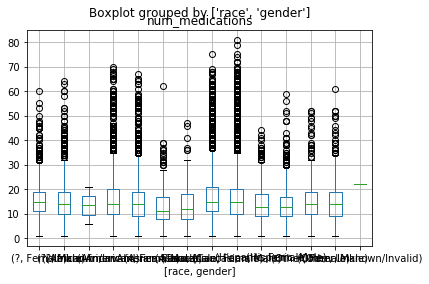

In [14]:
plot_subset.boxplot(by = ['race', 'gender'])

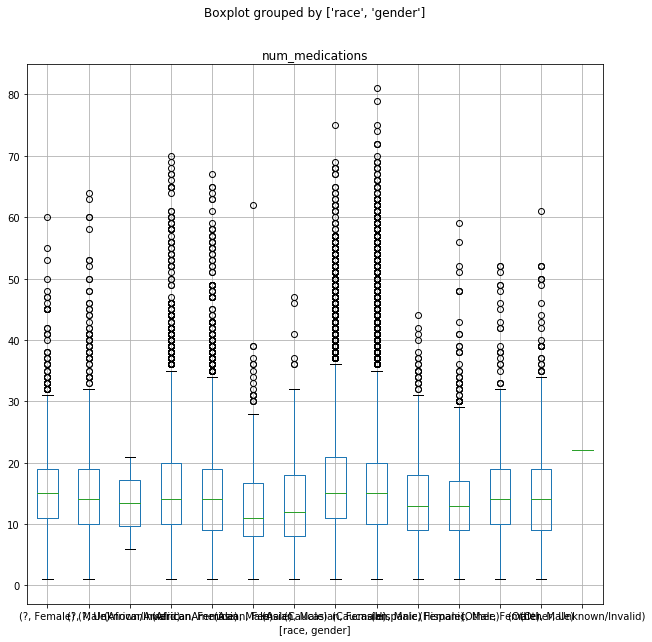

In [29]:
box = diabetes_df.boxplot(['num_medications'], by = ['race', 'gender'], figsize=(10, 10))
plt.savefig('./matplotlib_example.png')

In [9]:
type(box)

matplotlib.axes._subplots.AxesSubplot

In [10]:
box

In [11]:
import seaborn as sns

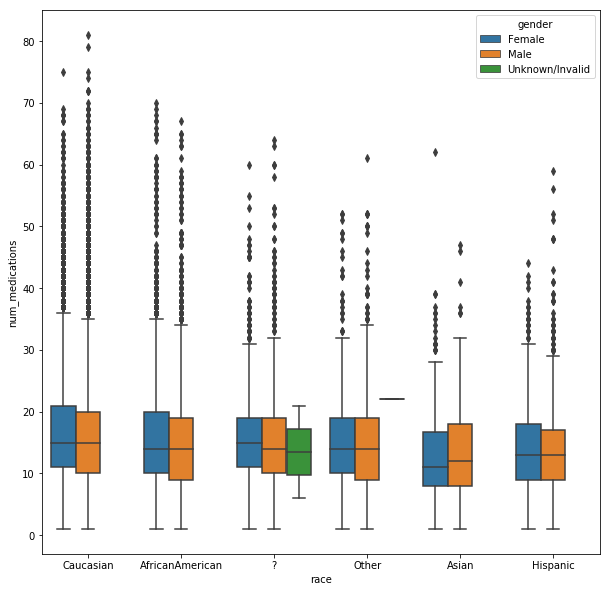

In [31]:
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'race', y = 'num_medications', hue = 'gender', data = plot_subset)
plt.savefig('seaborn_example.png')